<b><h1><u>TECHNOHACKS EDUTECH DATA SCIENCE INTERNSHIP

<h2>Task-1:- House Price Prediction

<h4>Use a dataset that includes information about housing prices and features like square footage, number of bedrooms, etc. 
to train a model that can predict the price of a new house


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.shape

(21613, 21)

#### checking for null values

In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- NO null values present

### EDA

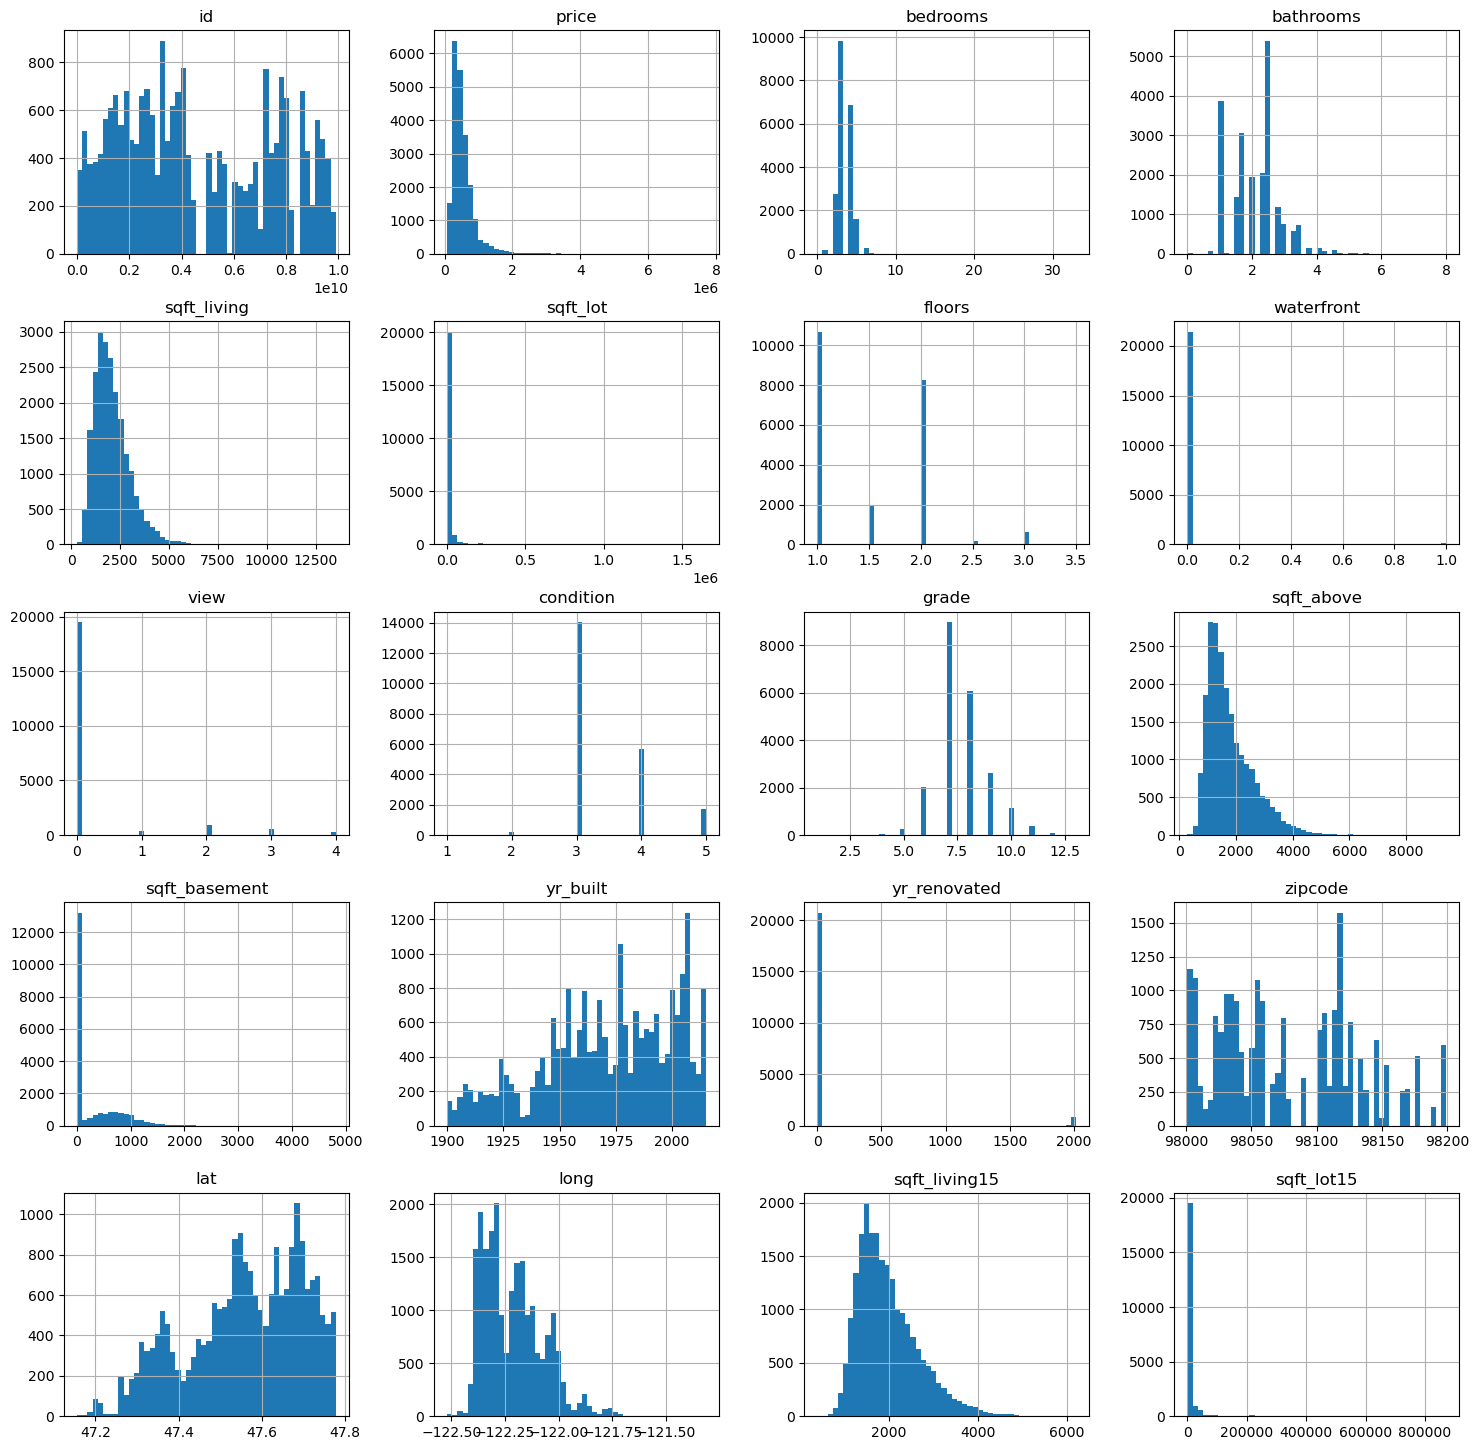

In [6]:
df.hist(bins=50, figsize=(18,18))
plt.show()

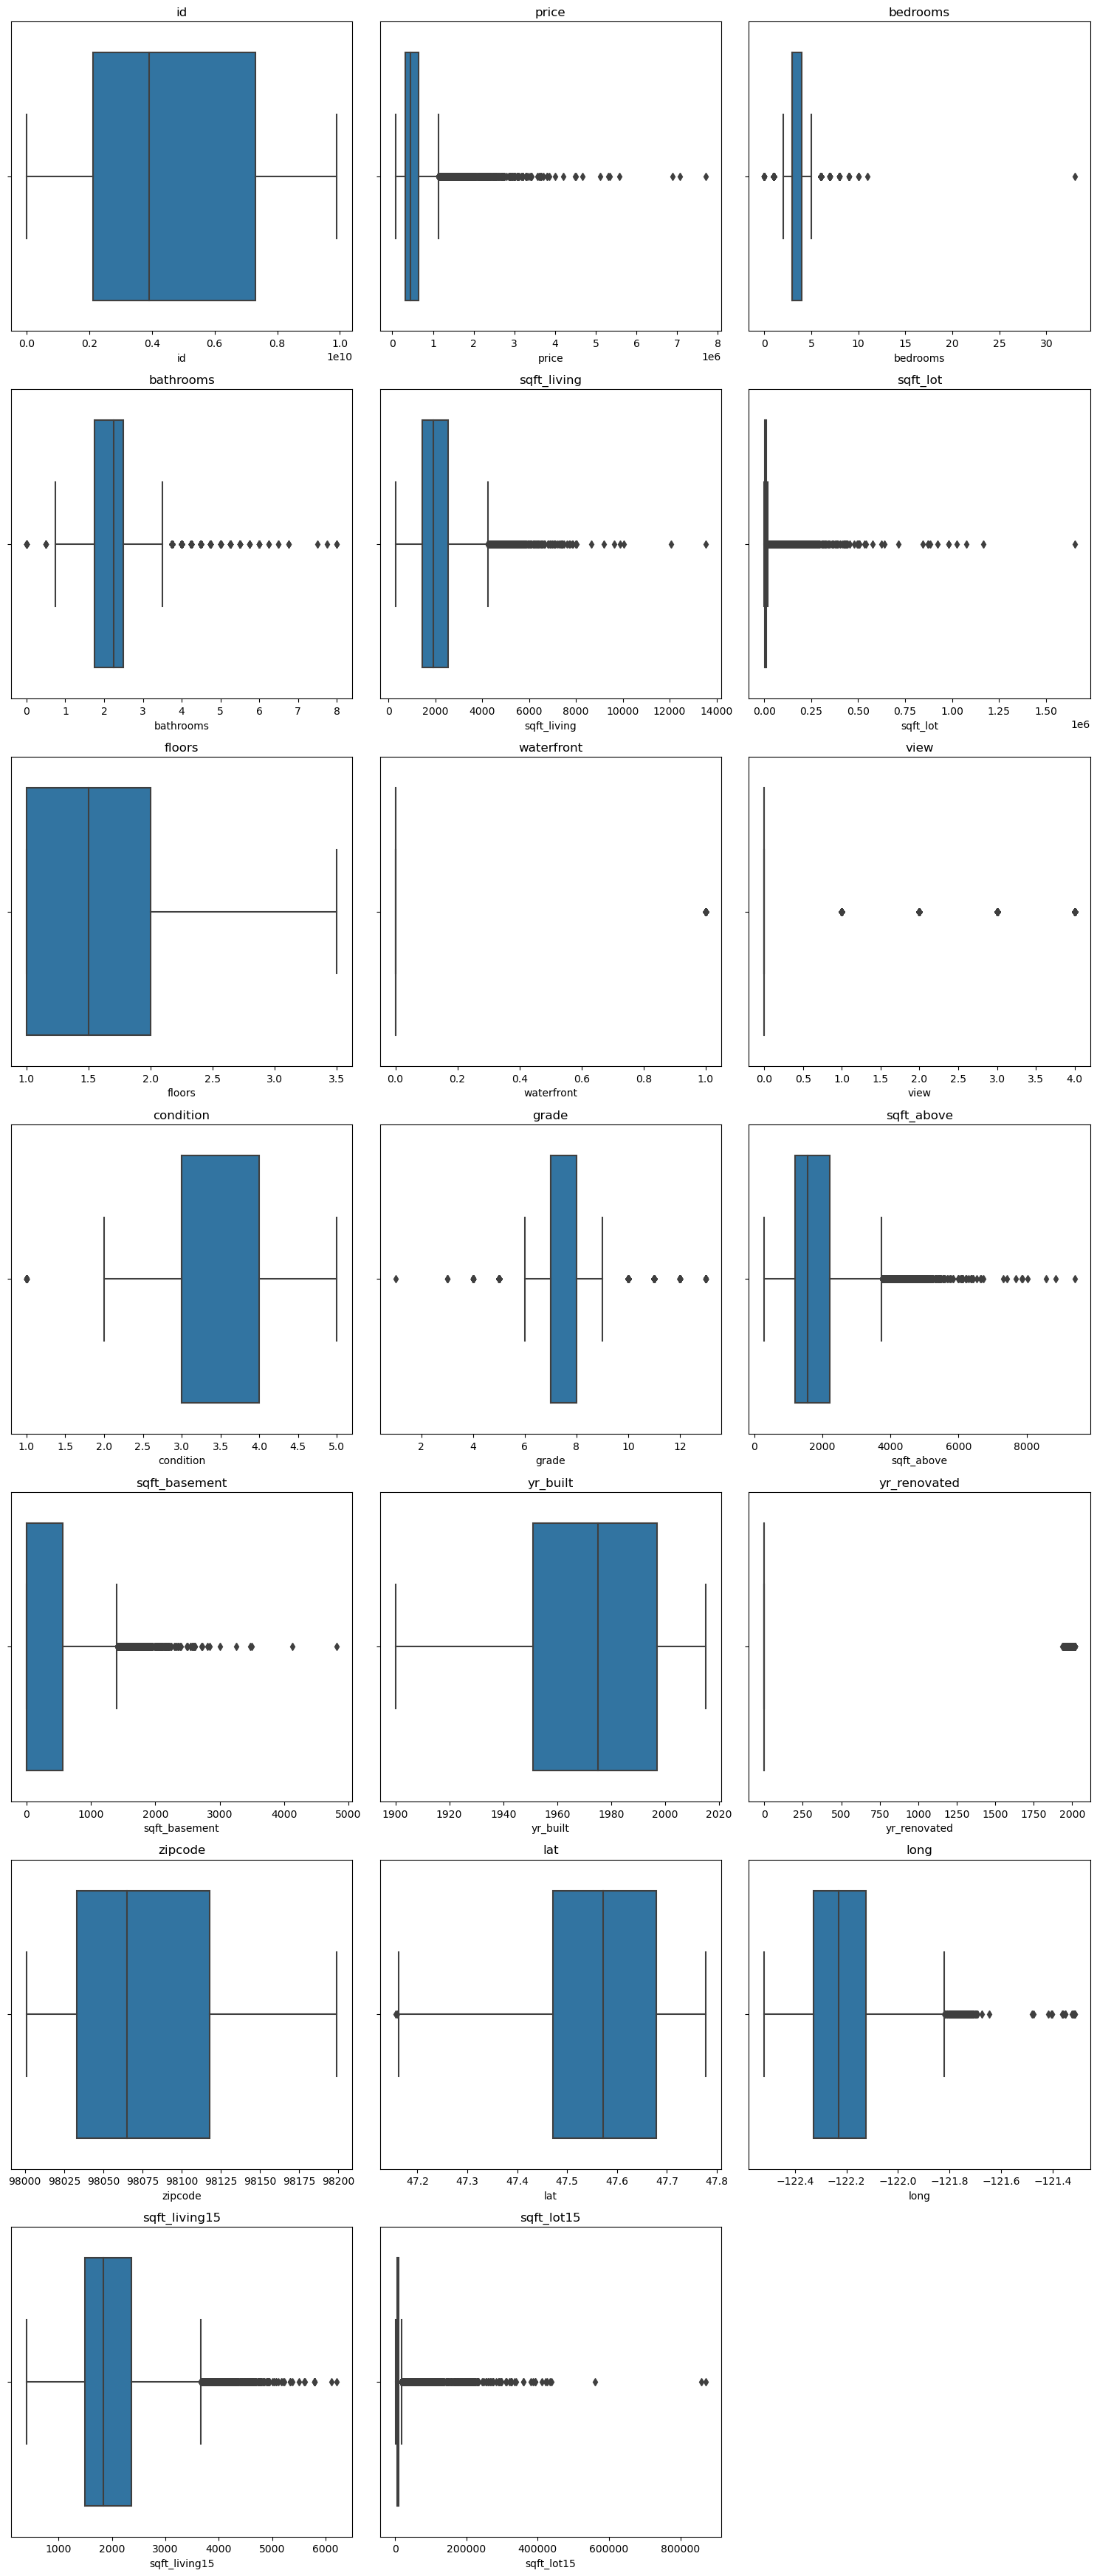

In [7]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

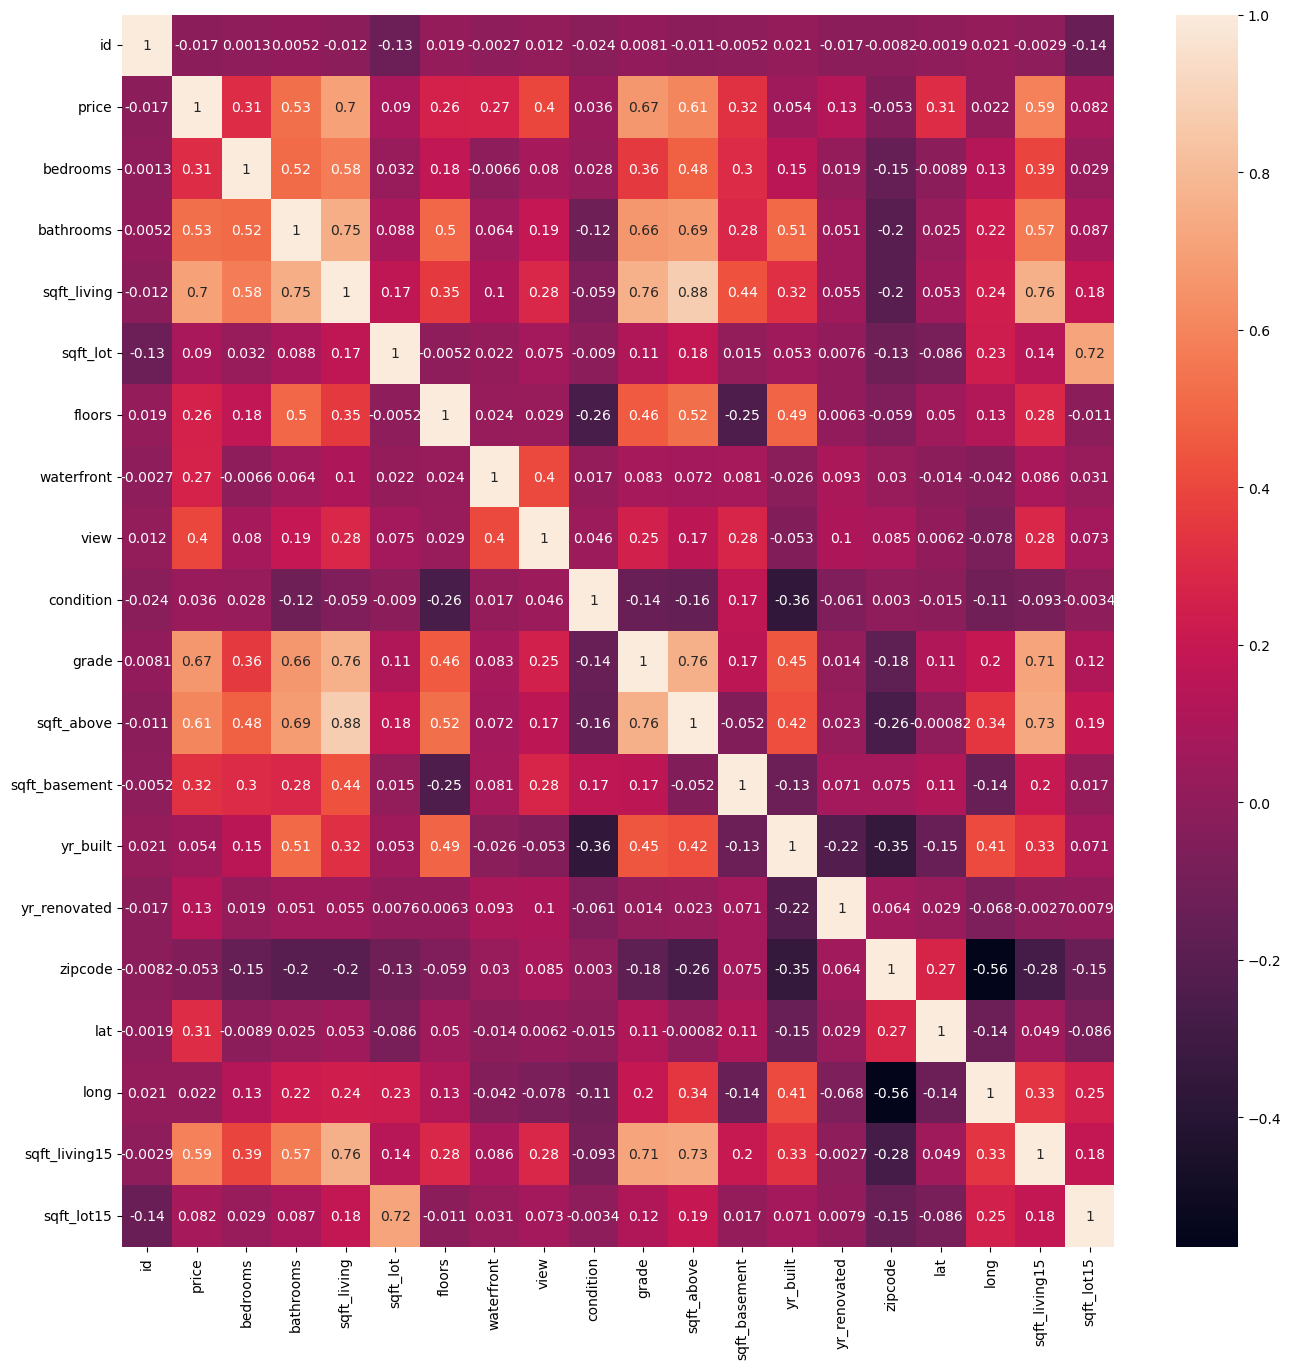

In [8]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

#### Data preprocessing

In [9]:
df.shape

(21613, 21)

In [10]:
#dropping the id and date
df.drop(["id", "date"], axis=1, inplace=True)
df.shape

(21613, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

#### Train test split

In [12]:
from sklearn.model_selection import train_test_split

#input and output data
X=df.drop("price", axis=1)
y=df["price"]

#train test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 18)
(4323, 18)
(17290,)
(4323,)


In [13]:
# model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
lr

LinearRegression()

In [14]:
# predictions
y_predict=lr.predict(X_test)
y_predict

array([502644.40974764, 545258.70471712, 969329.26929429, ...,
       831274.07512945, 303180.77384732, 432360.92344911])

#### Metrices

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MSE=round(mean_squared_error(y_test, y_predict),4)
MAE=round(mean_absolute_error(y_test, y_predict),4)
r2=round(r2_score(y_test, y_predict))

print("MSE:- ",MSE)
print("MAE:- ",MAE)
print("R-square:- ",r2)

MSE:-  38571315274.299
MAE:-  124697.7842
R-square:-  1


In [16]:
y_test.values[:5]

array([485000., 358000., 716500., 367500., 544000.])

In [17]:
y_predict[:5]

array([502644.40974764, 545258.70471712, 969329.26929429, 408956.44448117,
       468258.91678809])

<h3><center> $Thank-You$